In [ ]:
# Импорт библиотек
import cv2
import os
from time import time
import gdown

In [ ]:
# Проверка версии Python
!python --version 

Python 3.10.11


In [ ]:
# Проверка версии openCV
cv2.__version__

'4.7.0'

# Загрузка видеофайлов

Для оптимизации работы и исключания ошибок в процессе, следует загружать файлы с одного источника. Чтобы загрузить конкретный файл, необходимо снять комментарии с соответвующего батча.

In [ ]:
# Стартовая отметка времени
t_0 = time()

# Загрузка Batch 33 c Гугл Диска
#gdown.download('https://drive.google.com/uc?id=1QRoidQeHjPv0mTMoqn-7ODzUmLf85sUl', None, quiet=True)
#Path = '/content/033.mp4'

# Загрузка Batch 34 c Гугл Диска
#gdown.download('https://drive.google.com/uc?id=1rV9cTeA-hNw7V1vD0LOpMUXEminY8kil', None, quiet=True)
#Path = '/content/034.mp4'

# Загрузка Batch 35 c Гугл Диска
#gdown.download('https://drive.google.com/uc?id=1m4QVgxH2DYPF9h3ojgVvY2Lvhy9vd-7_', None, quiet=True)
#Path = '/content/035.mp4'

# Загрузка Batch 36 c Гугл Диска
#gdown.download('https://drive.google.com/uc?id=1HCDQ-E5GKrdM4eWugtg5zD0JkqeSIReG', None, quiet=True)
#Path = '/content/036.mp4'

# Загрузка Batch 37 c Гугл Диска
gdown.download('https://drive.google.com/uc?id=1UKk1kPf4JlffLCFUgNWGBKymBd3LqC2n', None, quiet=True)
Path = '/content/037.mp4'

# Загрузка Batch 38 c Гугл Диска
#gdown.download('https://drive.google.com/uc?id=1kWPzPp7Bdta4rb_RbMMFoIUDcsLOcjx5', None, quiet=True)
#Path = '/content/038.mp4'

# Загрузка Batch 39 c Гугл Диска
#gdown.download('https://drive.google.com/uc?id=1XK9brDnSbMketURhmyQIKoi74hE9TDVI', None, quiet=True)
#Path = '/content/039.mp4'

# Загрузка Batch 40 c Гугл Диска
#gdown.download('https://drive.google.com/uc?id=1mpY5tm2dvvanbnK5Y5RjCAYbdD7S_YpO', None, quiet=True)
#Path = '/content/040.mp4'

# Загрузка Batch 41 c Гугл Диска
#gdown.download('https://drive.google.com/uc?id=1hvYv6QGvH1Yh0CHYgbKq4Xd1Jh8h70fU', None, quiet=True)
#Path = '/content/041.mp4'

# Загрузка Batch 42 c Гугл Диска
#gdown.download('https://drive.google.com/uc?id=1rrXzDNhaQq5u6tADYxP9dhB3_gLeKyxg', None, quiet=True)
#Path = '/content/042.mp4'

# Расчет времени выполнения
t_f = time()-t_0

# Расчет времени обработи и приведение его к легко читаемому виду
print('\nЗагрузка видеофайлов потребовала: ' + str(int(round(t_f//60,0)))+' мин '+str(int(round(t_f%60,0)))+' сек.')


Загрузка видеофайлов потребовала: 0 мин 6 сек.


# Функции для извлечения кадров из видео

В функции **Video_to_Images** передусмотрена возможность задать начальный и конечный кадр для извлечения заданного диапазона кадров. Кадры нумеруются с 1. Если задать Start <= 1, а End > больше количества кадров в видео, то функция извлечет все кадры. В функции принудительно каждые 100 кадров используется переход к конкретному номеру кадра **video_in.set(cv2.CAP_PROP_POS_FRAMES,i)**. Первый переход делается для ускорения процесса, а остальные для единообразия результата вне зависимости от диапазона кадров.

Функция **Video_to_Images_All** не содержит настроек диапазона и соответственно не выполняет лишний цикл проверки для каждого кадра. Также в ней не используется переход к номеру кадра и она должна давать максимально точную раскадровку. Однако для получения идентичныз результатом, будем использовать только **Video_to_Images**.

В функциях предусмотрена возможность изменить минимальное количество символов для нумерации кадров, выбрать разделитель для имени файла и номеров кадров, а также поменять формат сохранения.

In [ ]:
# Функция извлечения кардов из видеофайла с возможностью выбора кадров
def Video_to_Images(Path,                      # Путь к файлу видео (пока загрузить вручную в Colab),
                    Start = 100,               # Стартовый кадр
                    End   = 199,               # Финишный кадр
                    Output_Path = 'Images',    # Папка для хранения изображений
                    Min_Digits  = 6,           # Количество символов для хранения кадров (будет увеличено если требуется больше)
                    Extension = '.jpg',        # Расширение файлов картинок (можно поменять на .png))
                    Separator = '_'):          # Разделитель имени файла и нумерации кадров

  
  # Стартовая отметка времени
  t_0 = time()

  # Создать объект захвата видео
  video_in = cv2.VideoCapture(Path)

  # Создание каталога для сохранения изображений
  if not os.path.isdir(Output_Path):
    os.mkdir(Output_Path)

  # Извлекаем из пути к файлу его имя
  _, filename = os.path.split(Path)

  # Отделяем имя от расширения (потребуется для сохранения изображений)
  name, _ = os.path.splitext(filename)

  # Количество кадров в секунду (примерная оценка)
  fps = int(video_in.get(cv2.CAP_PROP_FPS))

  # Всего кадров (примерная оценка)
  frames = int(video_in.get(cv2.CAP_PROP_FRAME_COUNT))

  # Максимальное количество символов которое требуется для записи номера кадра
  max_digits = len(str(frames))

  # Вывод информации о файле
  print('В видеофайле: '+ filename+'\nc частотой кадров: '+str(fps)+' кадр(а,ов)/сек\nсодержится (но это не точно): '+ str(frames)+' кадр(а,ов).')

  # Корректировка количества символов для хранения номера кадра
  if max_digits < Min_Digits: max_digits = Min_Digits

  print('\nСтарт чтения кадров ...\n')
  # Вычисляем ближайшую к заданному стартовому значению сотню кадров и начинаем с нее нумерацию
  num_frame = (Start//100)*100
  
  # Прыгаем к ней
  video_in.set(cv2.CAP_PROP_POS_FRAMES, num_frame)

  # Считываем заданный кадр
  is_read, frame = video_in.read()

  # Стартуем счетчик сохраненных кадров
  saved_frames = 0

  # Цикл пока не кончится файл или не дойдем до последнего требуемого кадра
  while is_read and num_frame <= End:

      # Если цикл достиг стартового номера кадра
      if num_frame >= Start:

        # Создается строка с номером кадра который добавляется нулями до нужного количества знаков     
        num_text = str(num_frame).rjust(max_digits, '0')

        # Кадр сохраняется в заданную папку (к имени видео добавляется номер кадра)
        cv2.imwrite(os.path.join(Output_Path, name + Separator + num_text + Extension), frame)

        # Увеличиваем счетчик сохраненных кадров
        saved_frames += 1

      # Читаем следующий кадр
      is_read, frame = video_in.read()

      # Увеличиваем счетчик кадров
      num_frame += 1

      # Если нумерация кадров кратна 100, осуществляем принудительный прыжок
      if num_frame%100 ==0:
        video_in.set(cv2.CAP_PROP_POS_FRAMES, num_frame)     

  # Освобождаем объект захвата видео
  video_in.release()
  cv2.destroyAllWindows()
 
  # Расчет времени выполнения
  t_f = time()-t_0

  # Расчет времени обработи и приведение его к легко читаемому виду
  time_text = str(int(round(t_f//60,0)))+' мин '+str(int(round(t_f%60,0)))+' сек.'

  # Подведение итогов обработки
  print('Из видеофайла: '+ filename +'\nв папку: ' + Output_Path + '\nизвлечено: '+ str(saved_frames) + ' кадр(а,ов)\nза: ' + time_text)

In [ ]:
# Функция извлечения всех кардов из видеофайла
def Video_to_Images_All(Path,                      # Путь к файлу видео (пока загрузить вручную в Colab),
                        Output_Path = 'Images',    # Папка для хранения изображений
                        Min_Digits  = 6,           # Количество символов для хранения кадров (будет увеличено если требуется больше)
                        Extension = '.jpg',        # Расширение файлов картинок (можно поменять на .png))
                        Separator = '_'):          # Разделитель имени файла и нумерации кадров

  
  # Стартовая отметка времени
  t_0 = time()

  # Создать объект захвата видео
  video_in = cv2.VideoCapture(Path)

  # Создание каталога для сохранения изображений
  if not os.path.isdir(Output_Path):
    os.mkdir(Output_Path)

  # Извлекаем из пути к файлу его имя
  _, filename = os.path.split(Path)

  # Отделяем имя от расширения (потребуется для сохранения изображений)
  name, _ = os.path.splitext(filename)

  # Количество кадров в секунду (примерная оценка)
  fps = int(video_in.get(cv2.CAP_PROP_FPS))

  # Всего кадров (примерная оценка)
  frames = int(video_in.get(cv2.CAP_PROP_FRAME_COUNT))

  # Максимальное количество символов которое требуется для записи номера кадра
  max_digits = len(str(frames))

  # Вывод информации о файле
  print('В видеофайле: '+ filename+'\nc частотой кадров: '+str(fps)+' кадр(а,ов)/сек\nсодержится (но это не точно): '+ str(frames)+' кадр(а,ов).')

  # Корректировка количества символов для хранения номера кадра
  if max_digits < Min_Digits: max_digits = Min_Digits

  print('\nСтарт чтения кадров ...\n')
  # Считываем первый кард
  is_read, frame = video_in.read()

  # Стартуем нумерацию кадров с 1
  num_frame = 1

  # Цикл пока не кончится файл или не дойдем до последнего требуемого кадра
  while is_read:
    
    # Создается строка с номером кадра который добавляется нулями до нужного количества знаков     
    num_text = str(num_frame).rjust(max_digits, '0')

    # Кадр сохраняется в заданную папку (к имени видео добавляется номер кадра)
    cv2.imwrite(os.path.join(Output_Path, name + Separator + num_text + Extension), frame)

    # Читаем следующий кадр
    is_read, frame = video_in.read()

    # Увеличиваем счетчик кадров
    num_frame += 1

  # Освобождаем объект захвата видео
  video_in.release()
  cv2.destroyAllWindows()

  # Расчет времени выполнения
  t_f = time()-t_0

  # Расчет времени обработи и приведение его к легко читаемому виду
  time_text = str(int(round(t_f//60,0)))+' мин '+str(int(round(t_f%60,0)))+' сек.'

  # Подведение итогов обработки
  print('Из видеофайла: '+ filename +'\nв папку: ' + Output_Path + '\nизвлечено: '+ str(num_frame-1) + ' кадр(а,ов)\nза: ' + time_text)

# Примеры применения (тесты)

Изучая результаты обработки можно заметить, что количество кадров предварительно рассчитанное **video_in.get(cv2.CAP_PROP_FRAME_COUNT)** отличается от числа реально извлеченных кадров. Это связанно с особенностями вычисления. Самый надежный способ, это последовательное извлечение. Именно поэтому для точного извлечения кадра по номеру не стоит использовать **video_in.set(cv2.CAP_PROP_POS_FRAMES,i)**. Однако это значительно ускоряет процесс. Поэтому мы все-таки будем этим пользоваться, но в режиме, который позволит воспроизводить раз за разом данную погрешность.

In [ ]:
# Запуск функции для выборки кадров от 100 до 199 включительно
Video_to_Images(Path, Start = 100, End = 199, Output_Path = 'Images_100_199') 

В видеофайле: 037.mp4
c частотой кадров: 19 кадр(а,ов)/сек
содержится (но это не точно): 23949 кадр(а,ов).

Старт чтения кадров ...

Из видеофайла: 037.mp4
в папку: Images_100_199
извлечено: 100 кадр(а,ов)
за: 0 мин 6 сек.


In [ ]:
# Запуск функции для выборки кадров от 15100 до 15499 включительно
Video_to_Images(Path, 15100, 15499, 'Images_15100_15499') 

В видеофайле: 037.mp4
c частотой кадров: 19 кадр(а,ов)/сек
содержится (но это не точно): 23949 кадр(а,ов).

Старт чтения кадров ...

Из видеофайла: 037.mp4
в папку: Images_15100_15499
извлечено: 400 кадр(а,ов)
за: 0 мин 26 сек.


In [ ]:
# Запуск функции для выборки кадров от 15100 до 15899 включительно
Video_to_Images(Path, 15100, 15899, 'Images_15100_15899') 

В видеофайле: 037.mp4
c частотой кадров: 19 кадр(а,ов)/сек
содержится (но это не точно): 23949 кадр(а,ов).

Старт чтения кадров ...

Из видеофайла: 037.mp4
в папку: Images_15100_15899
извлечено: 800 кадр(а,ов)
за: 0 мин 52 сек.


In [ ]:
# Запуск функции для всего видеофайла через указание широкого диапазона
Video_to_Images(Path, 0, 100000, 'Images_All') 

В видеофайле: 037.mp4
c частотой кадров: 19 кадр(а,ов)/сек
содержится (но это не точно): 23949 кадр(а,ов).

Старт чтения кадров ...

Из видеофайла: 037.mp4
в папку: Images_All
извлечено: 23950 кадр(а,ов)
за: 26 мин 8 сек.


In [ ]:
# Запуск функции для всего видеофайла
Video_to_Images_All(Path) 

В видеофайле: 037.mp4
c частотой кадров: 19 кадр(а,ов)/сек
содержится (но это не точно): 23949 кадр(а,ов).

Старт чтения кадров ...

Из видеофайла: 037.mp4
в папку: Images
извлечено: 23948 кадр(а,ов)
за: 25 мин 27 сек.


Функция **Video_to_Images_All** считывающая кадры только по порядку извлекла на 2 кадра меньше, чем **Video_to_Images** "прыгающая" каждые 100 кадров. С одной стороны при общем количестве кадров почти 24к в исследуемом видео - это не так много. Но для нашей задаче по аннотированию объектов для обучения нейронной сети это всеьма критично.

# Архивирование файлов изображений

Если необходимо скачать файлы изображений на локальный компьютер или на свой Google Диск, то их лучше предварительно заархивировать.

In [ ]:
# Стартовая отметка времени
t_0 = time()

print('Старт архивирования изображений ...\n')

# Архивирование файлов для удобства скачивания
!zip -q -r /content/images.zip /content/Images/*.*

# Расчет времени выполнения
t_f = time()-t_0

# Расчет времени обработи и приведение его к легко читаемому виду
print('\nАрхивирование изображений потребовало: ' + str(int(round(t_f//60,0)))+' мин '+str(int(round(t_f%60,0)))+' сек.')

Старт архивирования изображений ...


Архивирование изображений потребовало: 10 мин 59 сек.


In [ ]:
# Стартовая отметка времени
t_0 = time()

# Распаковка архива в папку MediaBuyer
!unzip -qo /content/images.zip -d /content/Images/UnpackedImages

# Расчет времени выполнения
t_f = time()-t_0

# Расчет времени обработи и приведение его к легко читаемому виду
print('\nРазархивирование изображений потребовало: ' + str(int(round(t_f//60,0)))+' мин '+str(int(round(t_f%60,0)))+' сек.')


Разархивирование изображений потребовало: 2 мин 53 сек.


# Вывод полученных кадров для сравнения

In [ ]:
# Загрузка библиотек для работы с графиками 
from matplotlib import pyplot as plt
%matplotlib inline

# Модули работы с изображениями
from PIL import Image, ImageDraw, ImageFont 

# Создание случайных величин
from random import randint

In [ ]:
# Пути к каталогам, маска файла по имени видео и номера кадров
list_of_dirs = ['Images_15100_15499','Images_15100_15899','Images_All','Images']
file_mask = '037_'
digits = 6
frame_nums = [randint(15100, 15499) for i in range(4)]
extension = '.jpg'

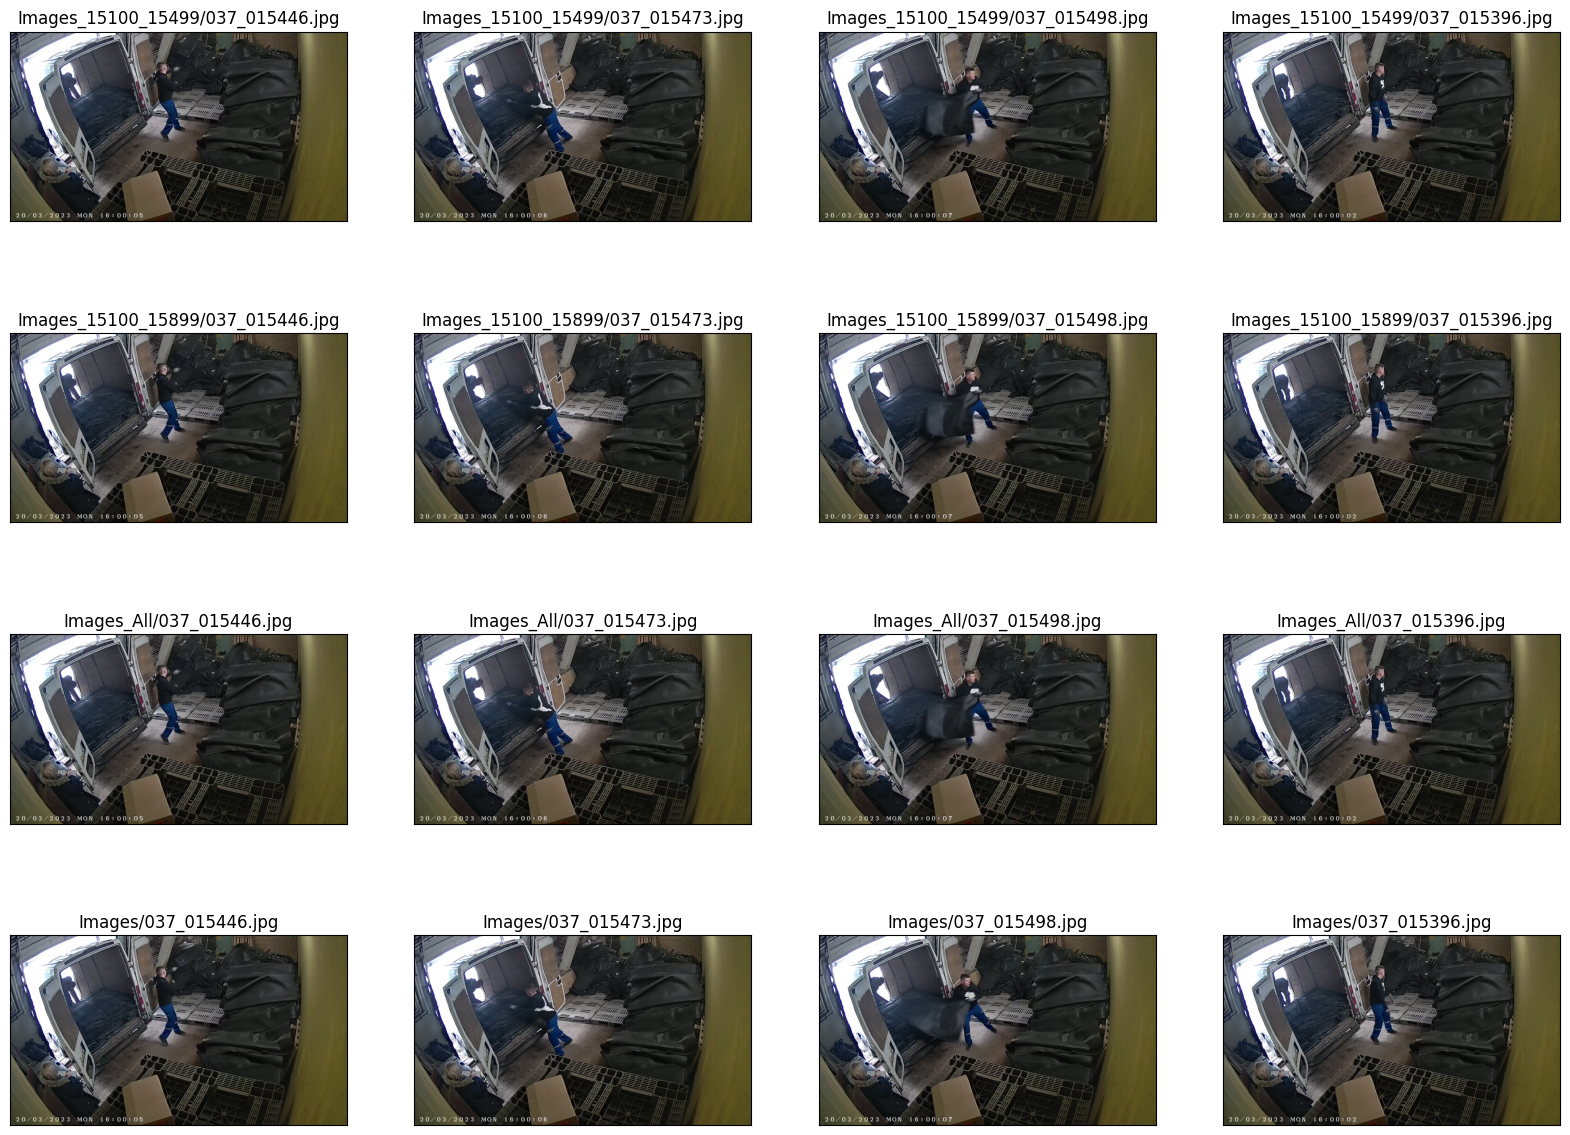

In [ ]:
# Выводим изображения для проверки
plt.figure(figsize = (20,15))
subplot_num = 1

for i in range(len(list_of_dirs)):
  for j in range(len(frame_nums)):
  
    # Загружаем изображение
    image_path = os.path.join(list_of_dirs[i],file_mask+str(frame_nums[j]).rjust(digits,'0')+extension)
    image = Image.open(image_path)

    # Создаем экземпляр изображения
    img = ImageDraw.Draw(image)
  
    # Размещаем на соответствущем подграфике
    ax = plt.subplot(len(list_of_dirs),len(frame_nums),subplot_num)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(image_path)
    plt.imshow(image)
    subplot_num += 1

# Рисуем изображение

plt.show() 

**Вывод**

Отображение картинок позволяет наглядно подтвердить 
теорию. Если в первых трех рядах, извлеченных одним методом, но с различным диапазоном картинки идентичны, то в последнем ряду на некоторых кардах можно заметить смещение. На самом деле смещение как раз в первых трех рядах, а четверты ряд, полученный послежовательным извлечением, как раз наиболее точно передает кадры.

Учитывая то, что при принудительном прыжке, через каждые 100 кадров получилось на два кадра больше, то можно предположить, что в какой-то момент прыжок попал не на 100 кратный кадр, а на 99-й.